**Business Problem Overview**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.The telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, For many incumbent operators, retaining high profitable customers is the number one business goal.

**Problem statement:**

 
To reduce customer churn by analysing customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn

In [4]:
#importing all necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

#setting display options
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [6]:
#importing the dataset 
df=pd.read_csv("telecom_churn_data.csv")

In [7]:
#inspecting the rows and columns
df.shape

(99999, 226)

In [8]:
#inspecting the data
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [9]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

all date related columns are in "object" datatype which needs to be converted into "date" type

In [10]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

####  Checking columns with no variance

In [11]:
#checking if the columns are having unique values
unique=df.nunique().sort_values(ascending=False)
unique

mobile_number               99999
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
total_og_mou_7              40477
total_og_mou_6              40327
total_og_mou_8              40074
total_og_mou_9              39160
total_ic_mou_6              32247
total_ic_mou_7              32242
total_ic_mou_8              32128
total_ic_mou_9              31260
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
loc_ic_mou_6                28569
loc_ic_mou_7                28390
loc_ic_mou_8                28200
std_og_mou_7                27951
loc_ic_mou_9                27697
std_og_mou_6                27502
std_og_mou_8                27491
std_og_mou_9                26553
loc_og_mou_6                26372
loc_og_mou_7                26091
loc_og_mou_8                25990
loc_og_mou_9                25376
onnet_mou_7   

There are few columns with unique values which adds no value to the analysis, hence we are removing it.

In [12]:
unique_columns=unique[unique==1].index


#dropping the columns with unique values
df.drop(unique_columns, axis=1,inplace= True)

In [13]:
#number of columns after removing the unique ones

df.shape

(99999, 210)

#### DataType Handling

In [14]:
#converting date as object to date type
date_col=["date_of_last_rech_6",'date_of_last_rech_7' , 'date_of_last_rech_8','date_of_last_rech_9']



df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6']).dt.day
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7']).dt.day
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8']).dt.day
df['date_of_last_rech_9'] = pd.to_datetime(df['date_of_last_rech_9']).dt.day

There are few columns in which it is named as jun, july,aug,sep instead of 6,7,8,9, hence renaming the columns

In [15]:
#'jun_vbc_3g' : 'vbc_3g_6'
#'jul_vbc_3g' : 'vbc_3g_7'
#'aug_vbc_3g' : 'vbc_3g_8'
#'sep_vbc_3g' : 'vbc_3g_9'

df.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

###  Handling Missing Values

In [16]:
percent=100*(df.isnull().sum()/df.shape[0])
total=df.isnull().sum()
missing_values=pd.concat([total,percent],axis=1, keys=['Total', 'Percent']).sort_values("Percent",ascending=False)

#filtering the missing values
missing_values[missing_values["Total"]!=0]

,Total,Percent
max_rech_data_6,74846,74.846748
fb_user_6,74846,74.846748
count_rech_3g_6,74846,74.846748
count_rech_2g_6,74846,74.846748
night_pck_user_6,74846,74.846748
arpu_3g_6,74846,74.846748
total_rech_data_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
arpu_2g_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748


We can inspect the total recharge data and date of last recharge data so as to identify if the customer made any recharges

In [17]:
df[df["total_rech_data_6"].isnull()][["total_rech_data_6", "date_of_last_rech_data_6","av_rech_amt_data_6"]].head(5)

,total_rech_data_6,date_of_last_rech_data_6,av_rech_amt_data_6
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN


In [18]:
df[df["total_rech_data_7"].isnull()][["total_rech_data_7", "date_of_last_rech_data_7","av_rech_amt_data_7"]].head(5)

,total_rech_data_7,date_of_last_rech_data_7,av_rech_amt_data_7
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN


In [19]:
df[df["total_rech_data_9"].isnull()][["total_rech_data_9", "date_of_last_rech_data_9","av_rech_amt_data_9"]].head(5)

,total_rech_data_9,date_of_last_rech_data_9,av_rech_amt_data_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


As we could see from above results that total recharge data and date of last recharge data are both missing which means that the customer hasn't made any recharge at all, so we can impute this values with Zero.

In [20]:
#columns for which the null values 

recharge_columns_tobeimputed_to_zero=["total_rech_data_6","av_rech_amt_data_6",
"total_rech_data_7","av_rech_amt_data_7",
"total_rech_data_8","av_rech_amt_data_8",
"total_rech_data_9","av_rech_amt_data_9"]

In [21]:
df[recharge_columns_tobeimputed_to_zero]=df[recharge_columns_tobeimputed_to_zero].apply(lambda x : x.fillna(0))

In [22]:
#check if data are properly imputed 
df[recharge_columns_tobeimputed_to_zero].isnull().any()

total_rech_data_6     False
av_rech_amt_data_6    False
total_rech_data_7     False
av_rech_amt_data_7    False
total_rech_data_8     False
av_rech_amt_data_8    False
total_rech_data_9     False
av_rech_amt_data_9    False
dtype: bool

In [23]:
#The following columns are categories, hence we are imputing it with "-1" as new level for missing values

category_columns =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

In [24]:
# replace missing values with '-1' in categorical columns

#0- not using
#1-using
#-1 - data not available


df[category_columns] = df[category_columns].apply(lambda x: x.fillna(-1))

In [25]:
#checking the imputed values

for i in category_columns:
    print(i,df[i].unique())

night_pck_user_6 [ 0. -1.  1.]
night_pck_user_7 [ 0. -1.  1.]
night_pck_user_8 [ 0. -1.  1.]
night_pck_user_9 [-1.  0.  1.]
fb_user_6 [ 1. -1.  0.]
fb_user_7 [ 1. -1.  0.]
fb_user_8 [ 1. -1.  0.]
fb_user_9 [-1.  1.  0.]


#### Removing columns that have more than 70% null values

In [26]:
#list of column names that have more than 70% null values

percent=100*(df.isnull().sum()/df.shape[0])
total=df.isnull().sum()
missing_values=pd.concat([total,percent],axis=1, keys=['Total', 'Percent']).sort_values("Percent",ascending=False)

#filtering the missing values
missing_values[missing_values["Total"]>0]

columns_with_70cent_nullvalues=missing_values[missing_values["Percent"]>70].index.values

In [27]:
columns_with_70cent_nullvalues

array(['date_of_last_rech_data_6', 'arpu_2g_6', 'arpu_3g_6',
       'count_rech_3g_6', 'max_rech_data_6', 'count_rech_2g_6',
       'count_rech_2g_7', 'date_of_last_rech_data_7', 'count_rech_3g_7',
       'arpu_2g_7', 'max_rech_data_7', 'arpu_3g_7', 'count_rech_3g_9',
       'count_rech_2g_9', 'arpu_3g_9', 'max_rech_data_9', 'arpu_2g_9',
       'date_of_last_rech_data_9', 'count_rech_2g_8', 'arpu_2g_8',
       'count_rech_3g_8', 'date_of_last_rech_data_8', 'max_rech_data_8',
       'arpu_3g_8'], dtype=object)

Dropping all the columns that have more than 70% null values

In [28]:
df.drop(columns_with_70cent_nullvalues,axis=1, inplace=True)

checking the missing values again

In [29]:
#checking missing values again

percent=100*(df.isnull().sum()/df.shape[0])
total=df.isnull().sum()
missing_values=pd.concat([total,percent],axis=1, keys=['Total', 'Percent']).sort_values("Percent",ascending=False)

#filtering the missing values
missing_6_percent=missing_values[missing_values["Percent"]>6]
missing_6_percent_column=missing_6_percent.index.values

There are multiple features that 8% null values. We'll check those columns as they have equal naull value percentage

In [30]:
df[df["std_og_t2t_mou_9"].isnull()][missing_6_percent_column].head()

,std_og_t2t_mou_9,loc_og_t2t_mou_9,spl_ic_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_ic_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,std_ic_t2f_mou_9,spl_og_mou_9,og_others_9,std_ic_t2m_mou_9,loc_ic_t2t_mou_9,std_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_og_t2m_mou_9,loc_ic_mou_9,onnet_mou_9,isd_ic_mou_9,ic_others_9,roam_ic_mou_9,offnet_mou_9,roam_og_mou_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, It looks like for 7745 Customers all these features are empty together without any value. We can choose to impute these values with 0 also.

In [31]:
df[missing_6_percent_column]=df[missing_6_percent_column].apply(lambda x : x.fillna(0))

Now, lets check for missing values again,

In [32]:
#checking missing values again

percent=100*(df.isnull().sum()/df.shape[0])
total=df.isnull().sum()
missing_values=pd.concat([total,percent],axis=1, keys=['Total', 'Percent']).sort_values("Percent",ascending=False)

#filtering the missing values
missing_5_percent_column=missing_values[missing_values["Percent"]>5].index.values

df[df['std_ic_mou_8'].isnull()][missing_5_percent_column].head(3)

,std_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,og_others_8,std_ic_t2m_mou_8,loc_og_t2f_mou_8,std_og_t2m_mou_8,loc_og_t2m_mou_8,std_ic_t2f_mou_8,loc_ic_t2f_mou_8,loc_og_t2t_mou_8,std_og_t2f_mou_8,roam_og_mou_8,loc_og_mou_8,std_og_mou_8,offnet_mou_8,ic_others_8,spl_og_mou_8,onnet_mou_8,isd_ic_mou_8,isd_og_mou_8,loc_ic_t2t_mou_8,spl_ic_mou_8,roam_ic_mou_8
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It again looks like, all these features are null all together. Hence we are imputing them with zero

In [33]:
df[missing_5_percent_column]=df[missing_5_percent_column].apply(lambda x : x.fillna(0))

still, there are few columns with less than 3% missing values and we are imputing them with median values

In [34]:
#checking missing values again

percent=100*(df.isnull().sum()/df.shape[0])
total=df.isnull().sum()
missing_values=pd.concat([total,percent],axis=1, keys=['Total', 'Percent']).sort_values("Percent",ascending=False)

#filtering the missing values
columns_with_nullvalues=missing_values[missing_values["Percent"]!=0].index.values

for i in columns_with_nullvalues:
    df[i]=df[i].replace( np.NaN,df[i].median())


Checking if all the missing values are imputed

In [35]:
df.isnull().sum()

mobile_number          0
arpu_6                 0
arpu_7                 0
arpu_8                 0
arpu_9                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
onnet_mou_9            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
offnet_mou_9           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_ic_mou_9          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
roam_og_mou_9          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2t_mou_9       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2m_mou_9       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2f_mou_9       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_t2c_mou_9       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0


#### Derived features

we can create Total_volume_data=  (vol_2gmb + vol_3gmb) 

In [36]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'
for i in range(6,10):
    df['vol_data_mb_'+str(i)] = (df['vol_2g_mb_'+str(i)]+df['vol_3g_mb_'+str(i)]).astype(int)

In [37]:
#dropping the features that were used to create new variable
df.drop(['vol_2g_mb_6','vol_2g_mb_7' ,'vol_2g_mb_8' ,'vol_2g_mb_9',
         'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9'],axis=1,inplace=True)

#### Filter high-value customers

High Value customers : who have recharged with an amount more than or equal to **70th percentile of the average recharge amount in the first two months (the good phase)**

Good phase = 6th and 7th month

In [38]:
#Total recharge of data = Number of recharges on data * Average recharge amount on data
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7


#total recharge= total call recharge + total data recharge
df['total_recharge_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['total_recharge_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [39]:
#Average_recharge = (total recharge on 6th month + total recharge on 7th month)/2

df["Average_total_recharge"]= (df['total_recharge_6']+df['total_recharge_7'])/2

In [40]:
print("70th percentile of total average", df.Average_total_recharge.quantile(0.7))

70th percentile of total average 478.0


Filtering the high profile customers whose average recharge amount is greater than 478

In [41]:
df= df[df["Average_total_recharge"]>df.Average_total_recharge.quantile(0.7)]

In [42]:
#columns after removing the low profile customers 

df.shape

(29953, 187)

In [43]:
# delete variables created to filter high-value customers
df = df.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'total_recharge_6', 'total_recharge_7'], axis=1)
df.shape

(29953, 183)

### Indentifying churners:


In [44]:
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']



# calculate total incoming and outgoing minutes of usage
df['total_calls_mou_9'] = df.total_ic_mou_9 + df.total_og_mou_9

# calculate 2g and 3g data consumption
df['total_internet_mb_9'] =  df.vol_data_mb_9

### churn variable creation :

In [45]:
# those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn

df['churn'] = df.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) else 0, axis=1)

Deleting the variables that was used to derive new attribute.

In [46]:
# delete derived variables
df = df.drop(['total_ic_mou_9', 'total_og_mou_9'], axis=1)

Deleting all columns on churn phase - Inorder to avoid Multicollinearity and data leakage

In [47]:
#filtering all the columns that has 9 on it, as 9th month is considered to be churn phase
churn_phase_columns =df.filter(regex='9$', axis=1).columns

In [48]:
#dropping the columns with churn phase
df.drop(churn_phase_columns,axis=1,inplace= True)

In [49]:
#columns after removing the churn phase
df.shape

(29953, 139)

### Data Visualisation

In [50]:
def plot(feature):
    feature1 = df.filter(regex =feature).columns
    fig, ax = plt.subplots(figsize=(7,4))
    feature_df=df.groupby(['churn'])[feature1].mean().T
    plt.plot(feature_df)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    
    # Add titles
    plt.title(str(feature)+"V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(str(feature))
              
              

#### Average recharge per unit

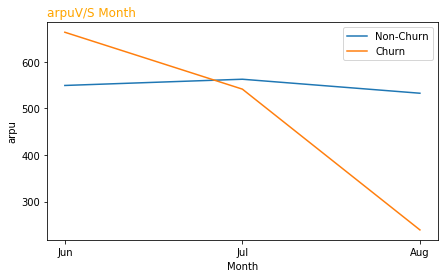

In [51]:
plot("arpu")

1. Average revenue per user is clearly decreasing for churners and 

2. It maintains almost stable for non churners 

3. And this could be a possible key feature to predict churns 

#### Onnet/Offnet Memory of usage:

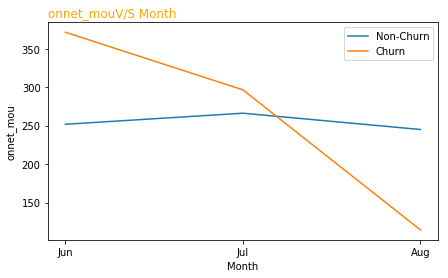

In [52]:
plot("onnet_mou")

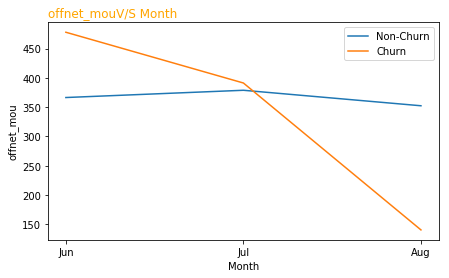

In [53]:
plot("offnet_mou")

1. All kind of calls inside and outside network memory of usage decreases for churners eventually, a
2. And for non churners it maintains a balance in all three months

#### Total Data Volume

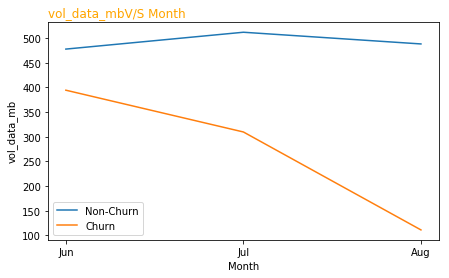

In [54]:
plot("vol_data_mb")

1. The volume of data mb used drops significantly for churners from month Jul(6) to Aug(7).
2. While it remains almost consistent for the non-churners.



#### Total local Incoming/Outgoing Memory of usage

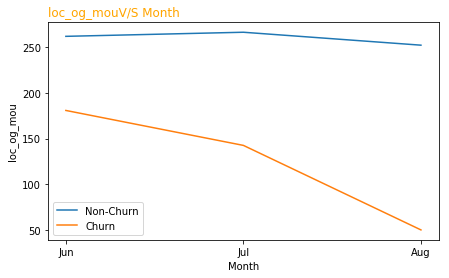

In [55]:
plot("loc_og_mou")

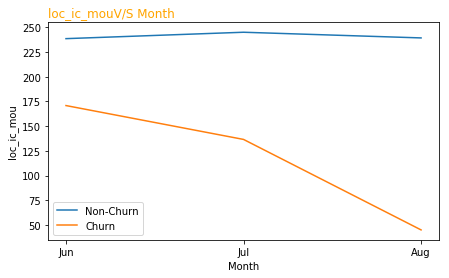

In [56]:
plot("loc_ic_mou")

1. The Local call mou is genrally low for churners right from the begining of the good phase.

2. local mou pattern for the non-churners remains almost constant all the months.

3. The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.

4. This might suggest that people who are not making/receiving much local calls during their tenure are more likely to churn

#### Data Imbalance

In [57]:
# print churn ratio
print("Churn Ratio:")
print(df.churn.value_counts()*100/df.shape[0])

Churn Ratio:
0    91.860582
1     8.139418
Name: churn, dtype: float64


The data is **highly imbalanced**, as it contains only 8% of churn customers while non churn customers are 92%

In [58]:
#making a copy of df

new_df=df.copy()

### Data Preparation:

In [59]:
#checking datatype 

df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 139 columns):
mobile_number             int64
arpu_6                    float64
arpu_7                    float64
arpu_8                    float64
onnet_mou_6               float64
onnet_mou_7               float64
onnet_mou_8               float64
offnet_mou_6              float64
offnet_mou_7              float64
offnet_mou_8              float64
roam_ic_mou_6             float64
roam_ic_mou_7             float64
roam_ic_mou_8             float64
roam_og_mou_6             float64
roam_og_mou_7             float64
roam_og_mou_8             float64
loc_og_t2t_mou_6          float64
loc_og_t2t_mou_7          float64
loc_og_t2t_mou_8          float64
loc_og_t2m_mou_6          float64
loc_og_t2m_mou_7          float64
loc_og_t2m_mou_8          float64
loc_og_t2f_mou_6          float64
loc_og_t2f_mou_7          float64
loc_og_t2f_mou_8          float64
loc_og_t2c_mou_6          float64
loc_og_t

In [60]:
df.shape

(29953, 139)

All columns are numeric type, hence encoding is not required

### Train Test split

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop(["churn","mobile_number"], axis = 1)
y = df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

This **stratify** parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

here our variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that  random split has 25% of 0's and 75% of 1's.

In [62]:
print("Train:",X_train.shape,y_train.shape)
print("Test",X_test.shape ,y_test.shape)


Train: (22464, 137) (22464,)
Test (7489, 137) (7489,)


There are about 137 columns available, which is really huge for analysis, hence we are making a PCA model to derive principal components for further anlaysis

#### Data standardisation:

In [63]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
X_train.head(4)


X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])
X_test.head(4)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,Average_total_recharge
75530,0.303736,0.750665,0.534278,-0.550647,-0.544110,-0.512706,-0.700815,-0.706354,-0.690244,-0.208457,0.311801,-0.161947,-0.230378,-0.097802,-0.200154,-0.349336,-0.317569,-0.327222,-0.531199,-0.626316,-0.618805,0.055325,-0.144074,-0.297495,-0.253989,-0.20519,-0.242334,-0.559339,-0.614262,-0.616152,-0.399348,-0.419286,-0.379650,-0.440290,-0.424859,-0.392357,-0.149157,-0.142561,-0.141042,-0.564594,-0.566241,-0.512284,-0.051316,-0.054363,-0.05468,-0.329176,-0.317373,-0.333712,-0.145798,-0.015764,-0.018191,-0.815612,-0.840539,-0.782631,-0.374156,-0.349261,-0.380418,-0.398273,-0.286159,-0.396138,0.001347,0.027422,0.129598,-0.473441,-0.381273,-0.453169,-0.192976,-0.190003,-0.196594,-0.290372,-0.287986,-0.254323,-0.138318,-0.141774,-0.131624,-0.337674,-0.331213,-0.308670,-0.561063,-0.482606,-0.540968,-0.306541,-0.099075,-0.235354,-0.136110,-0.144644,-0.154510,-0.077370,-0.090629,-0.090913,-0.736299,-0.607904,-0.538119,-0.287023,1.404799,-0.655444,0.465091,4.543206,-0.176543,0.324855,0.815493,-0.717305,1.037527,-0.707831,-0.296230,-0.593239,-0.604270,-0.542907,-0.646916,-0.668685,-0.622108,-1.093133,-1.120595,-1.043310,-0.39932,-0.405677,-0.375392,-0.425767,-0.446662,-0.417350,-0.354388,-0.347888,-0.342928,-0.218357,-0.210531,-0.185925,-1.098213,-1.121824,-1.037680,2.559569,-0.104072,-0.233582,-0.379010,-0.484981,-0.505484,-0.465409,-0.110424
61820,-1.106514,-0.483777,-0.396010,-0.574177,-0.549472,-0.507226,-0.738130,0.323410,-0.270614,-0.208457,-0.163585,-0.161947,-0.230378,-0.213548,-0.200154,-0.371395,-0.322424,-0.316780,-0.657334,-0.524129,-0.590675,-0.282334,-0.283140,-0.297495,-0.253989,0.61472,-0.242334,-0.676085,-0.560987,-0.591720,-0.413449,-0.419286,-0.379650,-0.392951,0.714234,0.086734,-0.149157,-0.142561,-0.141042,-0.541875,0.207719,-0.190186,-0.062835,-0.054363,-0.05468,-0.206320,0.016366,-0.307738,-0.145798,-0.015764,-0.018191,-0.857329,-0.115071,-0.491350,-0.383467,-0.362176,-0.376381,-0.490333,-0.565729,-0.488712,-0.330163,-0.332409,-0.3

#### Principle component analysis(PCA)- Dimensionality reduction technique 

Applying PCA on the dataset

Points to be considered while doing PCA:

    The data set should be scaled and centered

    The data applied should be having linear combination

    PCA cannot be applied on data which are not collinear



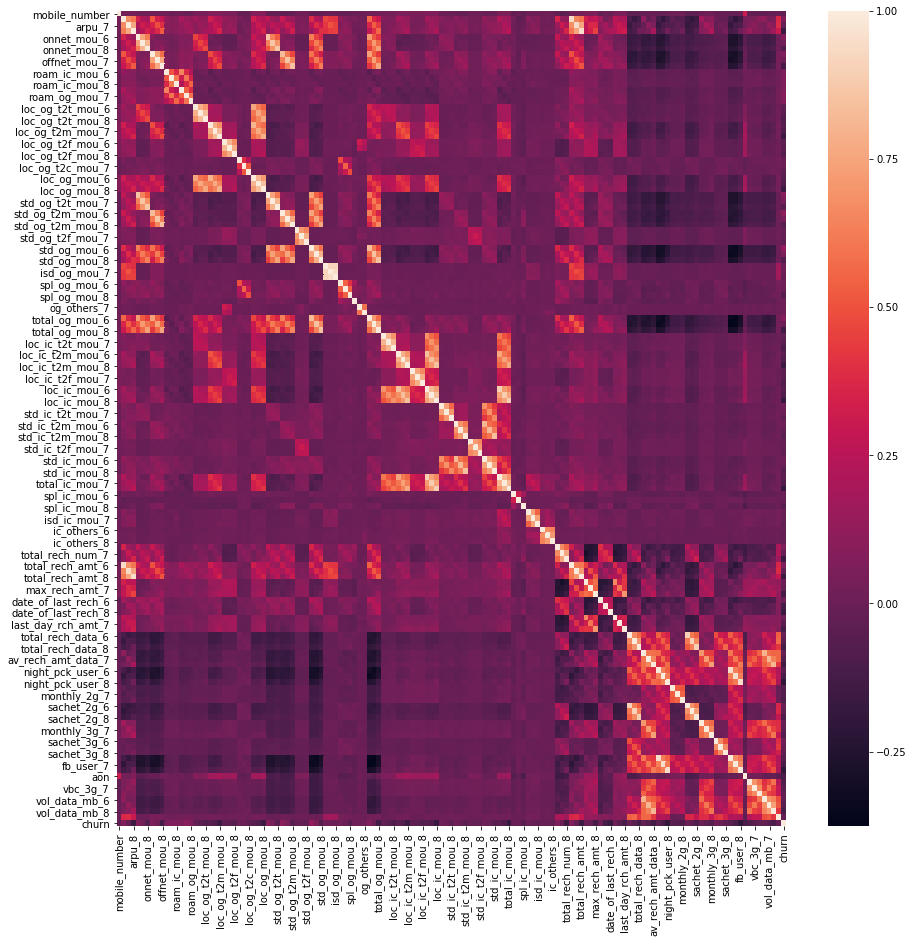

In [64]:
#checking correlation 
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

Correlation exists between the features,there is a possibility of dimensionality reduction through PCA

In [65]:
from sklearn.decomposition import PCA

pca= PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
pca.components_

array([[ 1.36493156e-01,  1.41965345e-01,  1.32554915e-01, ...,
        -9.77666674e-02, -8.56079616e-02, -2.83196957e-02],
       [ 7.31953199e-02,  7.95508698e-02,  9.43256849e-02, ...,
         1.25309499e-01,  1.27564098e-01,  1.04913981e-01],
       [ 1.42127570e-01,  1.73925635e-01,  1.72852228e-01, ...,
         1.73306435e-01,  1.72822340e-01,  2.11914860e-01],
       ...,
       [-0.00000000e+00,  9.92035443e-16,  1.62492738e-15, ...,
         6.74190597e-18,  1.06090350e-15, -5.32620550e-16],
       [-0.00000000e+00, -1.76895233e-16,  1.58075406e-16, ...,
        -5.85035692e-17,  8.67075117e-18, -1.61945575e-17],
       [ 0.00000000e+00,  1.33745183e-16, -2.73272398e-17, ...,
         3.21760370e-17,  6.97533417e-17,  1.06711956e-16]])

In [67]:
#Expained variance ratio to identify the number of PCA
pca.explained_variance_ratio_

array([1.13649915e-01, 8.78182327e-02, 6.19079783e-02, 4.93396935e-02,
       4.25249856e-02, 3.41324889e-02, 3.00663266e-02, 2.63360301e-02,
       2.48598457e-02, 2.30646856e-02, 2.18447920e-02, 2.00051331e-02,
       1.98438464e-02, 1.93476435e-02, 1.88836345e-02, 1.74591898e-02,
       1.59242326e-02, 1.47899222e-02, 1.46633943e-02, 1.39058691e-02,
       1.32330208e-02, 1.24455742e-02, 1.17982515e-02, 1.14989534e-02,
       1.03613715e-02, 1.01438251e-02, 9.45107159e-03, 8.67819342e-03,
       8.37753450e-03, 8.02651628e-03, 7.62478358e-03, 7.24889892e-03,
       7.04531996e-03, 7.00037723e-03, 6.89710150e-03, 6.63317958e-03,
       6.42263634e-03, 6.39681575e-03, 6.22848518e-03, 6.07766746e-03,
       5.81158484e-03, 5.61921116e-03, 5.49313521e-03, 5.09992581e-03,
       4.92818972e-03, 4.80562503e-03, 4.63705228e-03, 4.60856892e-03,
       4.54458544e-03, 4.46619869e-03, 4.12666293e-03, 3.90853409e-03,
       3.75679562e-03, 3.71934941e-03, 3.58013924e-03, 3.44678264e-03,
      

Text(0.5, 0, ' Number of Principle components')

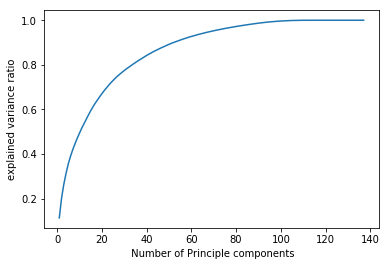

In [68]:
#scree plot using cumulative percentage 
cumsum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(cumsum)+1),cumsum)
plt.ylabel("explained variance ratio")
plt.xlabel(" Number of Principle components")

From this plot we could see that almost **90%** of information canbe captured through **53 Principle components**

In [69]:
#we are again creating new PCA with 53 components

pca2=PCA(n_components=53, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_train_pca.shape

(22464, 53)

In [70]:
X_train_pca

array([[ 0.0340543 , -2.86782919, -1.41904686, ...,  0.06559275,
        -0.34062544, -0.12062862],
       [ 4.05428692, -4.86976312,  1.81708129, ..., -0.15071419,
        -0.51626092,  0.26150994],
       [-3.82840354, -1.21911066, -0.84327309, ..., -0.08427333,
         0.66695558, -0.35756065],
       ...,
       [-1.80778687, -1.33524731, -0.39856068, ...,  0.21119856,
         0.16200354, -0.18204041],
       [ 3.59832784, -5.08017457,  1.18612658, ...,  0.13582582,
         0.02315394,  0.08788119],
       [ 4.28308628, -2.11970459,  0.24110742, ...,  0.38597426,
        -0.15052729, -0.11089612]])

In [71]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())


# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())

print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0



max corr: 1.365306215307505e-15 , min corr:  -7.524384664762868e-16


In [72]:
np.diagflat(corrmat)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.84142895e-16,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -7.04635700e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.58559090e-16,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.53017759e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

We could see that the matrix is **diagonalised** (non zeroes on diagonals and zeroes on other places) which means there is no correlation between any components. We have removed multicollinearity and our models will be much more stable

#### Applying PCA on Test data :


In [73]:
#Applying selected components to the test data - 50 components
X_test_pca = pca2.transform(X_test)
X_test_pca.shape

(7489, 53)

In [74]:
X_test_pca

array([[-0.4974    , -1.52535817, -1.51799941, ..., -0.34678462,
        -0.80041373, -0.09467024],
       [-3.29309092, -2.09130326, -0.27418698, ...,  0.3250947 ,
         0.03276352, -0.44648074],
       [-0.23427928,  1.83888956,  1.25953796, ..., -0.45848235,
        -0.30563891,  0.4243654 ],
       ...,
       [-0.22429337, -2.70806813, -2.62179664, ..., -0.18151899,
         0.32344948,  0.07388379],
       [ 1.11711339, -1.68261517, -1.01816197, ..., -0.07408229,
         0.04878468, -0.14677482],
       [-3.2144184 , -1.86027914, -1.23740975, ..., -0.04944988,
         0.08362132, -0.0988112 ]])

### Modelling:

In [75]:
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Logistic Regression:

In [76]:
#creating our first logistic regression model with "class weight = Balanced" inorder to handle class imbalance
lr= LogisticRegression(class_weight="balanced")

#fitting our first model
lr.fit(X_train_pca,y_train)

#train prediction using the model
y_train_pred=lr.predict(X_train_pca)

#probability prediction using the model
y_train_prob=lr.predict_proba(X_train_pca)[:,1]

#[:,1] is used because predict_proba gives you the probabilities for the target (0 and 1 ) in array form 
#and we are selecting only the probability of getting 1 


In [77]:
#creating a new df to store prediction values
y_train_pred_df = pd.DataFrame({'y_train':y_train.values, 'y_train_pred':y_train_pred,"y_train_prob":y_train_prob })
y_train_pred_df.head(3)

,y_train,y_train_pred,y_train_prob
0,0,0,0.424554
1,0,0,0.325356
2,0,0,0.069380


In [78]:
def getModelMetrics(actual_churn,pred_churn):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Accuracy score: {}".format(metrics.accuracy_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    

In [79]:
#Evaluvating the model prediction with default cut off probability 
getModelMetrics(y_train,y_train_pred)

Accuracy score: 0.8254540598290598
Sensitivity/Recall : 0.8331509846827133
Specificity: 0.8247722426826904
False Positive Rate: 0.17522775731730955
Positive predictive value: 0.2963611597587079
Negative Predictive value: 0.9823953823953824


As we could see from the evaluvation score, **accuracy score of 0.8** is achieved which is pretty good, but we can analyze the optimal cut off point.


**Plotting the ROC Curve : An ROC curve demonstrates several things:**

  >It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
  
  >The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
  
  >The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.



In [80]:
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

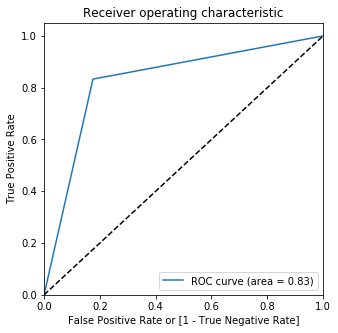

In [81]:
draw_roc_curve(y_train,y_train_pred )

The roc curve is lying in the top left corner which is a sign of a good fit and **area of ROC curve is 0.83 which is a good value**

#### Optimal cutoff point

Since recall or sensitivity is a important metrics for churn prediction. A trade off between sensitivity(or recall) and specificity is to be considered in doing so. We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

Sensitivity is the ratio of actual churns that are predicted correctly to the total churns, which is very important as we care more about the customers getting churned (**Customer retention**)

In [82]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.y_train_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,y_train,y_train_pred,y_train_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.424554,1,1,1,1,1,0,0,0,0,0
1,0,0,0.325356,1,1,1,1,0,0,0,0,0,0
2,0,0,0.069380,1,0,0,0,0,0,0,0,0,0
3,0,0,0.436517,1,1,1,1,1,0,0,0,0,0
4,1,1,0.905775,1,1,1,1,1,1,1,1,1,1


In [83]:
# accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.y_train, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081375  1.000000  0.000000
0.1   0.1  0.393875  0.974289  0.342460
0.2   0.2  0.564058  0.951313  0.529754
0.3   0.3  0.679977  0.915208  0.659139
0.4   0.4  0.762197  0.878009  0.751938
0.5   0.5  0.825454  0.833151  0.824772
0.6   0.6  0.866987  0.773523  0.875267
0.7   0.7  0.897436  0.696389  0.915245
0.8   0.8  0.919204  0.562910  0.950766
0.9   0.9  0.924813  0.286105  0.981392


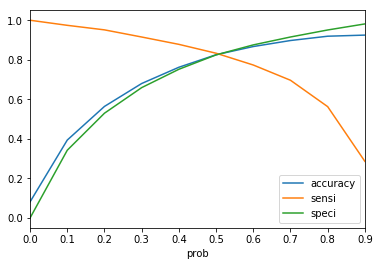

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the plot above 0.55 is the optimal cut off point, since we care more about sensitivity, we can adjust the cutoff point to **0.4**

In [85]:
cut_off_prob = 0.4

# Creating new column 'predicted' with 1 if Churn_Prob>0.4 else 0
y_train_pred_df['final_predicted'] = y_train_pred_df.y_train_prob.map( lambda x: 1 if x > cut_off_prob else 0)

getModelMetrics(y_train_pred_df.y_train,y_train_pred_df.final_predicted)

Accuracy score: 0.7621972934472935
Sensitivity/Recall : 0.8780087527352297
Specificity: 0.7519383601473154
False Positive Rate: 0.24806163985268462
Positive predictive value: 0.2386972040452112
Negative Predictive value: 0.9858322744599746


In [86]:
y_test_pred=lr.predict(X_test_pca)
y_test_prob=lr.predict_proba(X_test_pca)[:,1]



#creating a new df to store prediction values
y_test_pred_df = pd.DataFrame({'y_test':y_test.values, 'y_test_pred':y_test_pred,"y_test_prob":y_test_prob })


# Creating new column 'predicted' with 1 if Churn_Prob>0.45 else 0
y_test_pred_df['final_predicted'] = y_test_pred_df.y_test_prob.map( lambda x: 1 if x > cut_off_prob else 0)



getModelMetrics(y_test_pred_df.y_test,y_test_pred_df.final_predicted)


Accuracy score: 0.7589798370944051
Sensitivity/Recall : 0.8655737704918033
Specificity: 0.749527547608664
False Positive Rate: 0.250472452391336
Positive predictive value: 0.23456241670368724
Negative Predictive value: 0.9843451699121802


#### Logistic Regression- results:

As we care more about the customer retention, we check Sensitivity 

   > train Accuracy : **76%**
   > train sensitivity : **88%**
   
   >test Accuracy : **76%**
   > test sensitivity : **86%**


### 2.Decision Tree :

#### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [87]:
dt = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)

#Fit the algorithm on the data
dt.fit(X_train_pca,y_train)

#Predict training set:
y_train_pred= dt.predict(X_train_pca)
y_train_prob = dt.predict_proba(X_train_pca)[:,1]


In [88]:
#Let's check the model metrices.
getModelMetrics(y_train,y_train_pred)

Accuracy score: 0.7569444444444444
Sensitivity/Recall : 0.699671772428884
Specificity: 0.7620178329133553
False Positive Rate: 0.23798216708664469
Positive predictive value: 0.20662358642972536
Negative Predictive value: 0.9662652083077301


In [89]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}

# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:   27.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': range(5, 15, 3), 'min_samples_leaf': range(100, 400, 50), 'min_samples_split': range(100, 400, 100), 'max_features': [8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=1)

In [90]:
# printing the optimal accuracy score and hyperparameters
print('Recall :',grid_search.best_score_,)
print('Best params:',grid_search.best_params_)

Recall : 0.8181741811056022
Best params: {'max_depth': 5, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 100}


As we have a good recall value, we build new model based on beat parameters

In [91]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=5,
                             min_samples_leaf=150, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

#Fit the algorithm on the data
dt_final.fit(X_train_pca,y_train)

#Predict training set:
y_train_pred= dt_final.predict(X_train_pca)
y_train_prob = dt_final.predict_proba(X_train_pca)[:,1]

In [92]:
#Let's check the model metrices.
getModelMetrics(y_train,y_train_pred)


Accuracy score: 0.7667378917378918
Sensitivity/Recall : 0.7456236323851203
Specificity: 0.7686082574142276
False Positive Rate: 0.23139174258577244
Positive predictive value: 0.222059302704464
Negative Predictive value: 0.9715178243292907


In [93]:
y_test_pred=dt_final.predict(X_test_pca)
y_test_prob=dt_final.predict_proba(X_test_pca)[:,1]



#creating a new df to store prediction values
y_test_pred_df1 = pd.DataFrame({'y_test':y_test.values, 'y_test_pred':y_test_pred,"y_test_prob":y_test_prob })


# Creating new column 'predicted' with 1 if Churn_Prob>0.45 else 0
y_test_pred_df1['final_predicted'] = y_test_pred_df1.y_test_prob.map( lambda x: 1 if x > cut_off_prob else 0)



getModelMetrics(y_test_pred_df1.y_test,y_test_pred_df1.final_predicted)


Accuracy score: 0.743356923487782
Sensitivity/Recall : 0.7245901639344262
Specificity: 0.7450210786451519
False Positive Rate: 0.25497892135484806
Positive predictive value: 0.20127504553734063
Negative Predictive value: 0.9682599659928207


#### Decision Tree Model - Results:

   >train Accuracy : **77%**
   >train sensitivity : **75%**
   
   >test Accuracy : **74%**
   >test sensitivity : **72%**


The recall value is close to 70%, which is not a better value. Hence we can try Random Forest 

### Random Forest :

Lets tune the hyperparameters 

#### NOTE: Hyperparameter tuning is commented as it takes heavy  computing power and time.

Thus best hyperparameter values has been obtained after tuning and used for further analysis

In [94]:
'''# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20],
    'class_weight': [{0:0.1, 1: 0.9}, 'balanced']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)'''

"# Create the parameter grid based on the results of random search \nparam_grid = {\n    'max_depth': [8,10,12],\n    'min_samples_leaf': range(100, 400, 200),\n    'min_samples_split': range(200, 500, 200),\n    'n_estimators': [100,200, 300], \n    'max_features': [12, 15, 20],\n    'class_weight': [{0:0.1, 1: 0.9}, 'balanced']\n}\n# Create a based model\nrf = RandomForestClassifier()\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator = rf, param_grid = param_grid, \n                          cv = 3, n_jobs = 4,verbose = 1)"

In [95]:
'''# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)'''

'# Fit the grid search to the data\ngrid_search.fit(X_train_pca, y_train)'

In [96]:

'''# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)'''


"# printing the optimal accuracy score and hyperparameters\nprint('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)"

In [97]:
#These are the best values obtained for various hyperparameters

rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10,
                            class_weight= {0:0.1, 1: 0.9} )



In [98]:
#fitting the model created
rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=12, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False,
            random_state=10, verbose=0, warm_start=False)

In [99]:
#predicting test values
y_train_pred= rf.predict(X_train_pca)
y_train_prob = rf.predict_proba(X_train_pca)[:,1]

In [100]:
getModelMetrics(y_train,y_train_pred)

Accuracy score: 0.8807870370370371
Sensitivity/Recall : 0.8025164113785558
Specificity: 0.8877204884667571
False Positive Rate: 0.11227951153324288
Positive predictive value: 0.38768498942917545
Negative Predictive value: 0.9806745182012848


In [101]:
#creating a new df to store prediction values
y_train_pred_df1 = pd.DataFrame({'y_train':y_train.values, 'y_train_pred':y_train_pred,"y_train_prob":y_train_prob })
y_train_pred_df.head(3)


# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df1[i]= y_train_pred_df1.y_train_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df1.head()

,y_train,y_train_pred,y_train_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.318585,1,1,1,1,0,0,0,0,0,0
1,0,0,0.277556,1,1,1,0,0,0,0,0,0,0
2,0,0,0.034987,1,0,0,0,0,0,0,0,0,0
3,0,0,0.275203,1,1,1,0,0,0,0,0,0,0
4,1,1,0.906109,1,1,1,1,1,1,1,1,1,1


In [102]:
# accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df1.y_train, y_train_pred_df1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081375  1.000000  0.000000
0.1   0.1  0.388221  1.000000  0.334028
0.2   0.2  0.618367  0.992341  0.585239
0.3   0.3  0.751335  0.951860  0.733572
0.4   0.4  0.832131  0.883479  0.827583
0.5   0.5  0.880787  0.802516  0.887720
0.6   0.6  0.907140  0.705689  0.924985
0.7   0.7  0.924056  0.565646  0.955805
0.8   0.8  0.931090  0.357221  0.981925
0.9   0.9  0.922142  0.055799  0.998885


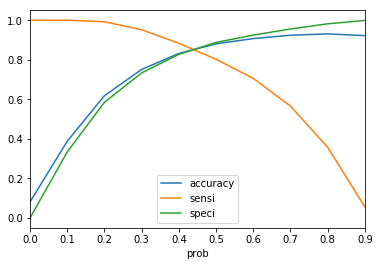

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [104]:
cut_off_prob = 0.45

# Creating new column 'predicted' with 1 if Churn_Prob>0.45 else 0
y_train_pred_df1['final_predicted'] = y_train_pred_df1.y_train_prob.map( lambda x: 1 if x > cut_off_prob else 0)

getModelMetrics(y_train_pred_df1.y_train,y_train_pred_df1.final_predicted)

Accuracy score: 0.8602653133903134
Sensitivity/Recall : 0.8435448577680525
Specificity: 0.8617464624927311
False Positive Rate: 0.13825353750726885
Positive predictive value: 0.3508532423208191
Negative Predictive value: 0.9841717859317063


In [105]:
y_test_pred=rf.predict(X_test_pca)
y_test_prob=rf.predict_proba(X_test_pca)[:,1]



#creating a new df to store prediction values
y_test_pred_df2 = pd.DataFrame({'y_test':y_test.values, 'y_test_pred':y_test_pred,"y_test_prob":y_test_prob })


# Creating new column 'predicted' with 1 if Churn_Prob>0.45 else 0
y_test_pred_df2['final_predicted'] = y_test_pred_df2.y_test_prob.map( lambda x: 1 if x > cut_off_prob else 0)



getModelMetrics(y_test_pred_df2.y_test,y_test_pred_df2.final_predicted)

Accuracy score: 0.8493790893310188
Sensitivity/Recall : 0.7721311475409836
Specificity: 0.8562291030673063
False Positive Rate: 0.1437708969326937
Positive predictive value: 0.3226027397260274
Negative Predictive value: 0.9769447669596948


### Random Forest results :

Random forest results after selecting optimal cutoof point

   >train Accuracy : 86% train sensitivity : 84%

   >test Accuracy : 85% test sensitivity : 77%
   
Train sensitivity seems to be good but test sensitivity is less compared to train sensitivity, which is not a very good indicator




### Final Model selection :

Our main objective is to identify customers at high risk of churn (Customer retention), Hence, Recall/Sensitivity is the most important feature that we need to rely upon. The company wants to identify most customers at risk of churning, even if there are many customers that are misclassified as churn as the cost to the company of churning is much higher than having a few false positives.

**Logistic Regression- results:** (probability cutoff -0.4)

    train Accuracy : 76% 
    train sensitivity : 88%

    test Accuracy : 76% 
    test sensitivity : 86%
            
            
            
**Decision Tree Model - Results:**

    train Accuracy : 77% 
    train sensitivity : 75%

    test Accuracy : 74% 
    test sensitivity : 72%


**Random Forest results :** (probability cutoff -0.45)
     
     

    train Accuracy : 86% 
    train sensitivity : 84%

    test Accuracy : 85% 
    test sensitivity : 77%


From, the results above Logistic Regression model performs pretty well with sensitivity greater than **85%** for both Test and Train with optimal probanility cut off value at 0.4. The overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting.

While Random forests performs well next with sensitivity greater than **75%** with an optimal cutoff probability as 0.45 

### Important Feature 

In [106]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10,
                             class_weight= {0:0.1, 1: 0.9} )

In [107]:
#fitting the model created
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=12, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=None, oob_score=False,
            random_state=10, verbose=0, warm_start=False)

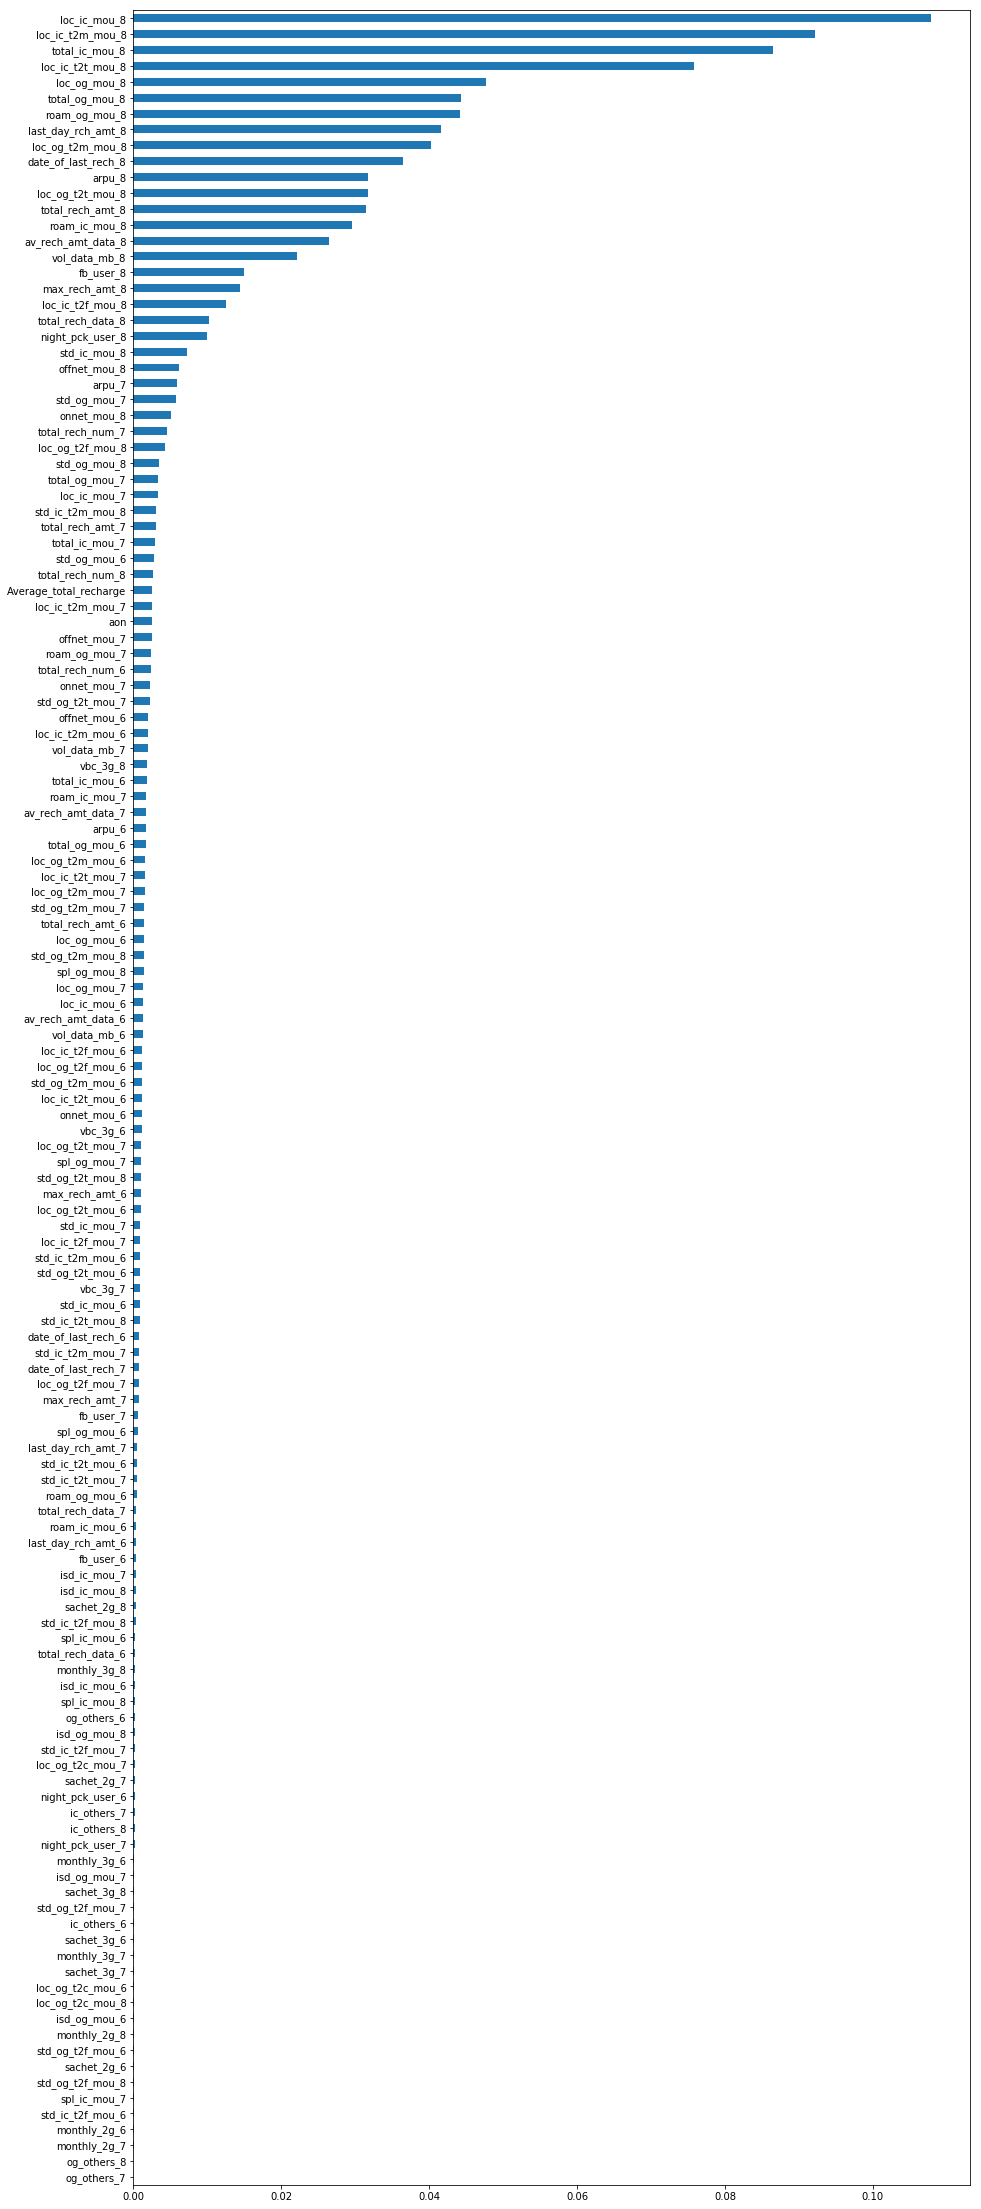

In [108]:
#to identify important variables that are strong predictors of churn.
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

It could be seen from the above  plot that top 25 features ranked in order corresponds to the 8th month, which is **Action phase** Hence it is evident that action phase has the greatest impact on customer churns and to increase the customer retention we should take utmost care on action phase and the top 40 features are listed below,

In [109]:
feature_importance = pd.DataFrame({'variables': X.columns, 'importance_percentage': rf.feature_importances_})
feature_importance = feature_importance[['variables', 'importance_percentage']]      

In [110]:
feature_importance.sort_values(by="importance_percentage",ascending= False)["variables"].head(30)

65            loc_ic_mou_8
59        loc_ic_t2m_mou_8
80          total_ic_mou_8
56        loc_ic_t2t_mou_8
29            loc_og_mou_8
53          total_og_mou_8
14           roam_og_mou_8
104     last_day_rch_amt_8
20        loc_og_t2m_mou_8
101    date_of_last_rech_8
2                   arpu_8
17        loc_og_t2t_mou_8
95        total_rech_amt_8
11           roam_ic_mou_8
110     av_rech_amt_data_8
135          vol_data_mb_8
128              fb_user_8
98          max_rech_amt_8
62        loc_ic_t2f_mou_8
107      total_rech_data_8
113       night_pck_user_8
77            std_ic_mou_8
8             offnet_mou_8
1                   arpu_7
40            std_og_mou_7
5              onnet_mou_8
91        total_rech_num_7
23        loc_og_t2f_mou_8
41            std_og_mou_8
52          total_og_mou_7
Name: variables, dtype: object

### Strategies to manage customer churn

The telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

As we could see from the plot above, Telecom company should pay close attention to **Income/Outcome - Minutes of usage, Average revenue per user, Total recharge, roaming - Incoming/Outgoing** on **Action phase**. These features should be monitored week on week basis and if a drop is found, the customers should be reached inorder to identify their grievances and introduce attractive offers for them to stay 

Text(0, 0.5, 'roaming')

<Figure size 432x288 with 0 Axes>

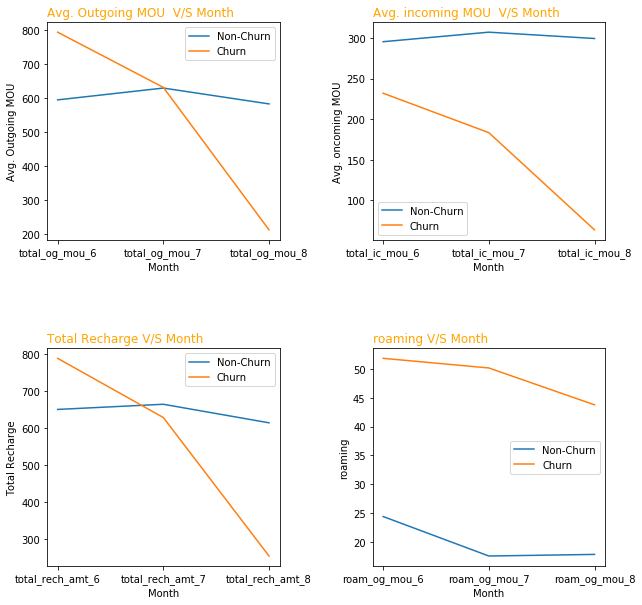

In [124]:

plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplots_adjust(hspace=0.5,wspace=0.4)
plt.subplot(2,2,1)

og_col = df.filter(regex ='total_og_mou').columns

og_df=df.groupby(['churn'])[og_col].mean().T
plt.plot(og_df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. "+'Outgoing'+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Month")
plt.ylabel("Avg. "+'Outgoing'+" MOU")



plt.subplot(2,2,2)
ic_col = df.filter(regex ='total_ic_mou').columns

ic_df=df.groupby(['churn'])[ic_col].mean().T
plt.plot(ic_df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. "+'incoming'+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Month")
plt.ylabel("Avg. "+'oncoming'+" MOU")

plt.subplot(2,2,3)
total_rech_amt_col = df.filter(regex ='total_rech_amt').columns

rec_df=df.groupby(['churn'])[total_rech_amt_col].mean().T
plt.plot(rec_df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Total Recharge V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Month")
plt.ylabel("Total Recharge")


plt.subplot(2,2,4)

roam_og_mou_col=df.filter(regex ='roam_og_mou').columns

roam_df=df.groupby(['churn'])[roam_og_mou_col].mean().T
plt.plot(roam_df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("roaming V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Month")
plt.ylabel("roaming")


As we could see from the above plots that churn rate was drastically increaing for every month, 

#### Average Outgoing :


 churner's outgoing minutes of usage was higher than that of non-churners. Gradually they dropped their outgoing usage.While the non churners maintain a same phase. This could possibly because the customers din't like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality, network coverage was not liked my them. This could be further investigated by the network service provider. 
 
 
 
 
 **Suggestions :**
 
 
 

>The service provider should revise the outgoing and incoming tarrifs to make it competitive.

>Discounted outgoing rates during particular hours of the night should be provided to the customers based on their outgoing usage.

>Good packages of Mobile internet usage volume or data pacakges should be given to the customers who are active on social networking sites

#### Total Recharge:

Churners total recharge was higher than the non churners in first month and it drastically got reduced in the last month. While the non churners maintain the same level of recharge. This may be because of the lacking of proper services from network provider.

#### Suggestions:

>The telecom service providers should allow their customers to easily switch over between the tariff plans to make them happy.

>The service providers should consistently deliver superior service benefits, customer support services, quality of service and competitive pricing.

>Attractive SMS and Internet packages (3G and 2G) will help service providers to attract and retain the students and younger age groups. The service providers should provide easy to activate mobile internet services. 

#### Roaming:

Churners show higher roaming usage than non-churners.

#### Suggestions:



>Discounted roaming rates during particular hours of the day.

>Free monthly roaming mou's depending on the users past roaming mou usage.

>The service provider should compare the roaming tarrifs with the competitor and offer good roaming packages to the existing customers.

